<a href="https://colab.research.google.com/github/pepetellez/BEDU-Data-Analysis/blob/main/Analisis-de-Datos-con-Python/7_Pruebas_A_B_y_Procesamiento_de_Lenguaje_Natural/s7_r1_pruebas_ab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reto 1: Pruebas A/B

### 1. Objetivos:
    - Practicar evaluar los resultados de una Prueba A/B
 
---
    
### 2. Desarrollo:

### a) Evaluando una prueba A/B de flujo de ventas

El archivo 'ab_test-sales_pipeline-2' tiene datos muy similares a los que vimos en el último ejemplo. Estamos evaluando dos flujos de ventas distintos: A y B. Cada vez que alguien compró el producto gracias a uno de los dos flujos, se registró como un `1` en la columna `conversion` y un `0` en la columna `no conversion`.

Evalúa la prueba A/B para saber si los resultados obtenidos son estadísticamente significativos. El Reto consiste en los siguientes pasos:

1. Primero cuantifica cuál de los flujos de ventas fue más efectivo y en qué proporción.
2. Después aplica el test de permutación:
    1. Combina los resultados de ambos grupos en un mismo conjunto de datos
    2. Revuelve los datos
    3. Usando muestreo aleatorio sin reposición, construye un nuevo grupo A del mismo tamaño que el original.
    4. El resto de los datos conforman nuestro nuevo grupo B.
    5. Cuantifica la métrica o estadística que calculaste con los grupos originales y guarda el resultado.
    6. Repite los pasos 1-5 `R` veces para obtener una distribución de la estadística de interés.
3. Grafica tus resultados en un histograma y grafica una línea vertical que marque el resultado del experimento.
4. Cuantifica el Valor P y evalúa la significación estadística con un Alfa de 0.05 (5%).
5. Comenta tus hallazgos con tus compañeros y la experta.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/ab_test-sales_pipeline-2.csv")
df.head()

,test,conversion,no conversion
0,A,0,1
1,B,0,1
2,A,0,1
3,A,0,1
4,B,0,1


In [ ]:
total_count = df.groupby("test")[["conversion","no conversion"]].sum()

In [ ]:
total_count

,conversion,no conversion
test,,
A,4163,30576
B,4841,36747


In [ ]:
total_count["succes_rate"] = total_count["conversion"] / (total_count["conversion"] + total_count["no conversion"])

In [ ]:
total_count.head()

,conversion,no conversion,succes_rate
test,,,
A,4163,30576,0.119836
B,4841,36747,0.116404


In [ ]:
diferencia_en_proporcion = 1 - (total_count.loc['B']['succes_rate'] / total_count.loc['A']['succes_rate'])
diferencia_en_porcentaje = diferencia_en_proporcion * 100

In [ ]:
all_measurements = df[["conversion", "no conversion"]]

In [ ]:
value_counts = df["test"].value_counts()
value_counts

B    41588
A    34739
Name: test, dtype: int64

In [ ]:
conv_a = []
no_conv_a = []
conv_b = []
no_conv_b = []

for _ in range(1000):
  a = df.sample(value_counts.loc["A"], replace=False)
  conv_a.append(a["conversion"].sum())
  no_conv_a.append(a["no conversion"].sum())

  b = df.loc[~df.index.isin(a.index)]
  conv_b.append(b["conversion"].sum())
  no_conv_b.append(b["no conversion"].sum())
  

In [ ]:
perm_results = pd.DataFrame({
    "conv_a": conv_a,
    "no_conv_a": no_conv_a,
    "conv_b": conv_b,
    "no_conv_b": no_conv_b
})

perm_results

,conv_a,no_conv_a,conv_b,no_conv_b
0,4051,30688,4953,36635
1,4033,30706,4971,36617
2,4060,30679,4944,36644
3,4067,30672,4937,36651
4,4052,30687,4952,36636
...,...,...,...,...
995,4095,30644,4909,36679
996,4125,30614,4879,36709
997,4070,30669,4934,36654
998,4163,30576,4841,36747


In [ ]:
perm_results["a_conv_rate"] = perm_results["conv_a"] / (perm_results["conv_a"] + perm_results["no_conv_a"])
perm_results["b_conv_rate"] = perm_results["conv_b"] / (perm_results["conv_b"] + perm_results["no_conv_b"])

perm_results.head()

,conv_a,no_conv_a,conv_b,no_conv_b,a_conv_rate,b_conv_rate
0,4051,30688,4953,36635,0.116612,0.119097
1,4033,30706,4971,36617,0.116094,0.119530
2,4060,30679,4944,36644,0.116872,0.118880
3,4067,30672,4937,36651,0.117073,0.118712
4,4052,30687,4952,36636,0.116641,0.119073


In [ ]:
perm_results["diff"] = 1 - (perm_results["b_conv_rate"] / perm_results["a_conv_rate"])
perm_results.head()

,conv_a,no_conv_a,conv_b,no_conv_b,a_conv_rate,b_conv_rate,diff
0,4051,30688,4953,36635,0.116612,0.119097,-0.021305
1,4033,30706,4971,36617,0.116094,0.119530,-0.029591
2,4060,30679,4944,36644,0.116872,0.118880,-0.017189
3,4067,30672,4937,36651,0.117073,0.118712,-0.014001
4,4052,30687,4952,36636,0.116641,0.119073,-0.020847


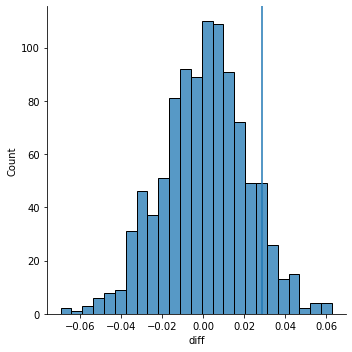

In [ ]:
sns.displot(perm_results["diff"], kde=False)
plt.axvline(diferencia_en_proporcion)

In [ ]:
print("P value: ",(perm_results["diff"] >= diferencia_en_proporcion).sum() / perm_results.shape[0])

P value:  0.081
